In [ ]:
# part 3) K-Means Clustering

In [ ]:
import numpy as np
from random import randint
from google.colab import drive
dataset1 = np.load ('/content/drive/MyDrive/hw2_material/kmeans/dataset1.npy')
dataset2 = np.load ('/content/drive/MyDrive/hw2_material/kmeans/dataset2.npy')
dataset3 = np.load ('/content/drive/MyDrive/hw2_material/kmeans/dataset3.npy')
dataset4 = np.load ('/content/drive/MyDrive/hw2_material/kmeans/dataset4.npy')

In [ ]:
# Function to find the Euclidean distance.
def find_euclidean_distance(data, cluster):
    distance = 0
    for i in range(data.shape[0]):
        distance = distance + ((data[i] - cluster[i]) ** 2) 
    
    return distance 

In [ ]:
# Function to find the squared Euclidean distance.
def find_squared_euclidean_distance(data, cluster):
    distance = 0
    for i in range(data.shape[0]):
        distance = distance + ((data[i] - cluster[i]) ** 2)

    return distance 

In [ ]:
# Function to find the closest cluster to a specific instance of the data set
def find_closest_centroid(instance, centroid):
    index_of_centroid_with_min_distance_to_instance = 0

    for i in range(1, len(centroid)):
        if find_euclidean_distance(instance, centroid[i]) < find_euclidean_distance(instance, centroid[index_of_centroid_with_min_distance_to_instance]):
            index_of_centroid_with_min_distance_to_instance = i

    return index_of_centroid_with_min_distance_to_instance

In [ ]:
def find_cluster_instance_belongs_to(instance, assignments):
    return assignments[instance]

In [ ]:
# Function to implement k-means ++ initialization of the centroids algorithm
def k_means_plus_plus_initialization(data, number_of_clusters):
    # randomly_chosen_first_centroid will hold the index of the first centroid
    randomly_chosen_first_centroid = randint(0, len(data) - 1)

    """
    Approach:
        1) find the centroid to which each data point is closest to
        2) choose the instance whose distance is furtherst from its closest cluster to be the next centroid
    """

    centroids = []
    initial_centroid = data[randomly_chosen_first_centroid].tolist()
    centroids.append(initial_centroid)

    index_of_closest_centroid_to_data = []

    for i in range(number_of_clusters - 1):
        # outer for loop will iterate over the data set and find the closest centroid to each instance of the data
        for i in range(len(data)):
            data_to_check = data[i].tolist()
            if (data_to_check in centroids) == False:
                index_of_closest_centroid_to_data.append([i, find_closest_centroid(data[i], centroids)])

        # outer loop will find the index of the instance which is furthers from its closest centroid
        index_of_instance_furthest_from_centroid = 0
        for i in range(1, len(index_of_closest_centroid_to_data)):
            if find_euclidean_distance(data[index_of_closest_centroid_to_data[i][0]], centroids[index_of_closest_centroid_to_data[i][1]]) > find_euclidean_distance(data[index_of_closest_centroid_to_data[index_of_instance_furthest_from_centroid][0]], centroids[index_of_closest_centroid_to_data[index_of_instance_furthest_from_centroid][1]]):
                index_of_instance_furthest_from_centroid = i

        # after this for loop we have finally found our next centroid :)
        next_centroid = data[index_of_closest_centroid_to_data[i][0]].tolist()
        centroids.append(next_centroid)

    return centroids

In [ ]:
def assign_clusters(data, cluster_centers):
    """
    Assigns every data point to its closest (in terms of Euclidean distance) cluster center.
    :param data: An (N, D) shaped numpy array where N is the number of examples
    and D is the dimension of the data
    :param cluster_centers: A (K, D) shaped numpy array where K is the number of clusters
    and D is the dimension of the data
    :return: An (N, ) shaped numpy array. At its index i, the index of the closest center
    resides to the ith data point.
    """

    
    # a numpy array to store the clusters assigned to each instance: 
    # At its index i, the index of the closest center resides to the ith data point.
    data_assigned_to_cluster = np.zeros(len(data), dtype= int)

    for i in range(len(data)):
        closest_cluster = 0
        for j in range(1, len(cluster_centers)):
            if find_euclidean_distance(data[i], cluster_centers[j]) < find_euclidean_distance(data[i], cluster_centers[closest_cluster]):
                closest_cluster = j

        data_assigned_to_cluster[i] = closest_cluster

    return data_assigned_to_cluster

In [ ]:
def calculate_cluster_centers(data, assignments, cluster_centers, k):
    """
    Calculates cluster_centers such that their squared Euclidean distance to the data assigned to
    them will be lowest.
    If none of the data points belongs to some cluster center, then assign it to its previous value.
    :param data: An (N, D) shaped numpy array where N is the number of examples
    and D is the dimension of the data
    :param assignments: An (N, ) shaped numpy array with integers inside. They represent the cluster index
    every data assigned to.
    :param cluster_centers: A (K, D) shaped numpy array where K is the number of clusters
    and D is the dimension of the data
    :param k: Number of clusters
    :return: A (K, D) shaped numpy array that contains the newly calculated cluster centers.
    """
    # this array will hold the data points assigned to a specific cluster all together:
    # in other words, each ith element of the list will be a list of instances assigned to the ith cluster
    list_holding_the_instances_of_each_cluster_in_a_list = [[] for i in range(len(cluster_centers))]
    # this for loop will store all the instances that belong to a specific cluster together
    for i in range(len(data)):
        list_holding_the_instances_of_each_cluster_in_a_list[assignments[i]].append([data[i][0], data[i][1]])



    # numpy array for newly calculated cluster centers.
    new_clusters = np.zeros((len(cluster_centers), 2))


    # the outer loop will traverse the clusters
    for i in range(len(list_holding_the_instances_of_each_cluster_in_a_list)):
        sum_of_x_coordinate = 0
        sum_of_y_coordinate = 0
        # the inner loop will traverse the instances belonging to the ith cluster and sum up their x and y coordinate
        # in order to find the new cluster center
        for j in range(len(list_holding_the_instances_of_each_cluster_in_a_list[i])):
            sum_of_x_coordinate = sum_of_x_coordinate + list_holding_the_instances_of_each_cluster_in_a_list[i][j][0]
            sum_of_y_coordinate = sum_of_y_coordinate + list_holding_the_instances_of_each_cluster_in_a_list[i][j][1]

        # If none of the data points belongs to some cluster center, then assign it to its previous value.
        if len(list_holding_the_instances_of_each_cluster_in_a_list[i]) == 0:
            new_clusters[i][0] = cluster_centers[i][0]
            new_clusters[i][1] = cluster_centers[i][1]
        # Otherwise, calculates cluster_centers such that their squared Euclidean distance to the data assigned to them will be lowest.
        else:
            new_clusters[i][0] = sum_of_x_coordinate / len(list_holding_the_instances_of_each_cluster_in_a_list[i])
            new_clusters[i][1] = sum_of_y_coordinate / len(list_holding_the_instances_of_each_cluster_in_a_list[i])

    return new_clusters

In [ ]:
def kmeans(data, initial_cluster_centers):
    """
    Applies k-means algorithm.
    :param data: An (N, D) shaped numpy array where N is the number of examples
    and D is the dimension of the data
    :param initial_cluster_centers: A (K, D) shaped numpy array where K is the number of clusters
    and D is the dimension of the data
    :return: cluster_centers, objective_function
    cluster_center.shape is (K, D).
    objective function is a float. It is calculated by summing the squared euclidean distance between
    data points and their cluster centers.
    """


    # assign the data to initial clusters
    old_data_assigned_to_cluster = assign_clusters(data, initial_cluster_centers)

    # calculate the new cluster center based on the assigned instances to the old cluster
    new_cluster_centers = calculate_cluster_centers(data, old_data_assigned_to_cluster, initial_cluster_centers, len(initial_cluster_centers))

    new_assignment_of_clusters = assign_clusters(data, new_cluster_centers)
   
    # in order to compare two numpy arrays: assignments of instances to old clusters and new clusters
    comparison = new_assignment_of_clusters == old_data_assigned_to_cluster


    # We continue the k-means algorithm until assignments of instances to the clusters do not change
    while comparison.all() == False:
        old_data_assigned_to_cluster = new_assignment_of_clusters
        new_cluster_centers = calculate_cluster_centers(data, new_assignment_of_clusters, new_cluster_centers, len(initial_cluster_centers))
        new_assignment_of_clusters = assign_clusters(data, new_cluster_centers)
        
        comparison = new_assignment_of_clusters == old_data_assigned_to_cluster


    # initially, we assign objective function to be zero
    objective_function = 0

    # objective function is calculated by summing the squared euclidean distance between
    for i in range(len(data)):
        #print(data[i], new_cluster_centers[old_data_assigned_to_cluster[i]])
        objective_function = objective_function + find_squared_euclidean_distance(data[i], new_cluster_centers[old_data_assigned_to_cluster[i]])    

    return new_cluster_centers, objective_function/2

In [ ]:
# Example Dataset
data = np.asarray([
    [0.10819829, 0.62605985],
    [2.51398245, -1.83387368],
    [-1.10033618, 1.6260801],
    [1.55090893, 0.50721597],
    [0.06768307, 0.25987913],
    [-0.71007112, -0.39629082],
    [-0.15968428, 0.20188463],
    [0.47420528, 0.15619532],
    [0.32459835, -1.46679356],
    [0.09095787, -1.28954287],
    [0.79781624, 0.20330339],
    [0.99588945, -0.51400183],
    [0.55095553, 0.10900426],
    [1.73990583, 2.31362988],
    [0.90012845, 0.88261231],
    [1.1065648, 2.19725047],
    [0.47113742, 0.21261273],
    [0.58259772, 2.02162784],
    [1.82886198, 0.8951408],
    [1.33025881, 1.16445873]
])

initial_cluster_centers = np.asarray([
    [0.37782442, 0.69733297],
    [1.92131603, 2.96226556],
    [1.51446483, 1.70932797]
])

# Expected Results
assignments_gt = np.asarray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2])
new_cluster_centers_gt = np.asarray([
    [0.45842465, -0.04771034],
    [1.92131603, 2.96226556],
    [1.31763783, 1.71842154]
])
resultant_cluster_centers_gt = np.asarray([
    [0.4924973, -0.39614757],
    [1.14302278, 2.17750273],
    [0.76967005, 0.95026129]
])
obj_function_gt = 10.153354513876504

# Testing Methods
assignments = assign_clusters(data, initial_cluster_centers)
print('assign_clusters test:', np.all(assignments == assignments_gt))

new_cluster_centers = calculate_cluster_centers(data, assignments, initial_cluster_centers, 3)
print('calculate_cluster_centers test:', np.all(np.abs(new_cluster_centers - new_cluster_centers_gt) < 10 ** -5))

resultant_cluster_centers, obj_function = kmeans(data, initial_cluster_centers)
print('kmeans test (resultant_cluster_centers):',
      np.all(np.abs(resultant_cluster_centers - resultant_cluster_centers_gt) < 10 ** -5))
print('kmeans test (obj_function):', abs(obj_function - obj_function_gt) < 10 ** -5)

assign_clusters test: True
calculate_cluster_centers test: True
kmeans test (resultant_cluster_centers): True
kmeans test (obj_function): True


In [ ]:
datasets = [dataset1, dataset2, dataset3, dataset4]
number_of_clusters = [1,2,3,4,5,6,7,8,9,10]

# the first index is 4 because we have four datasets
# the second index is 10 because we will go through 10 different number of clusters
# the third index is 2 because we will be storing the value of the objective function corresponding to the number of cluster
results = np.zeros((4, 10, 2))

#  most outer for loop will iterate for the datasets
for dataset in range(len(datasets)):
    # for each dataset we will iterate over multiple number of clusters
    for number_of_cluster in range(len(number_of_clusters)):
        # for each k value, we will try to find the minimum objective function resulting from random initialization of centroids
        objective_function_min = 999999999999
        # for each cluster, we will use several different initial cluster centers and try to find the one that gives the minimum value for the objective function
        for differet_centroids in range(10):
            initial_cluster_centers = k_means_plus_plus_initialization(datasets[dataset], number_of_clusters[number_of_cluster]) 
            cluster_centers, objective_function = kmeans(datasets[dataset], initial_cluster_centers)
            if objective_function < objective_function_min:
                objective_function_min = objective_function
        
        results[dataset][number_of_cluster][0] = number_of_clusters[number_of_cluster]
        results[dataset][number_of_cluster][1] = objective_function_min
        print(results[dataset][number_of_cluster])
    

[1.00000000e+00 3.31149816e+03]
[   2.         1037.00585804]
[  3.         802.10958247]
[  4.         612.84019031]
[  5.         472.96211765]
[  6.        394.8704183]
[  7.         338.31211251]
[  8.        299.7444863]
[  9.         271.30145238]
[ 10.         239.49255492]
[1.00000000e+00 1.38296822e+03]
[  2.         775.24919999]
[  3.         312.42418165]
[  4.         262.07593723]
[  5.         217.05879869]
[  6.         189.34948466]
[  7.         156.56728592]
[  8.         137.14856772]
[  9.         122.68257793]
[ 10.         109.36533152]
[1.00000000e+00 1.18777769e+04]
[2.00000000e+00 2.99367933e+03]
[   3.         1581.92247467]
[  4.         721.89631014]
[  5.         643.54677578]
[  6.         589.46070331]
[  7.         502.60513558]
[  8.         452.56227764]
[  9.         398.65537268]
[ 10.         363.61922611]
[1.00000000e+00 1.42839948e+03]
[  2.         710.21968518]
[  3.         407.96431289]
[  4.         131.00546209]
[  5.         117.10705459]






For Dataset No:  1


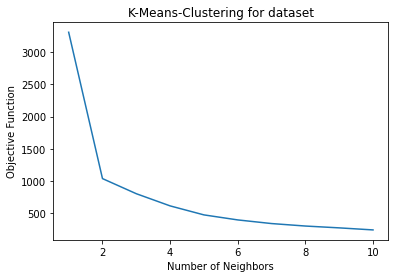





For Dataset No:  2


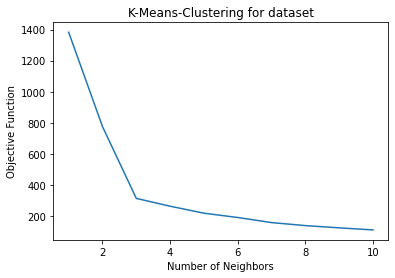





For Dataset No:  3


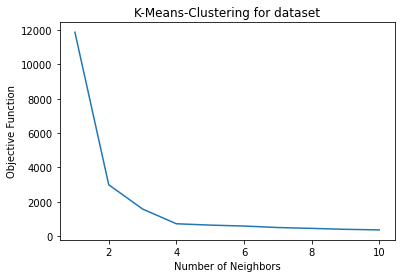





For Dataset No:  4


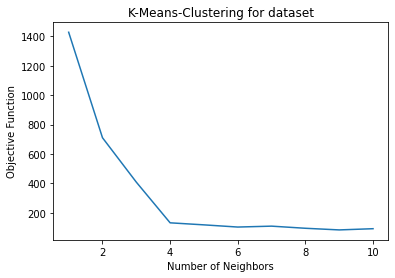

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(datasets)):
    print( "\n\n\n\n""For Dataset No: ", i+1)

    xpoints = results[i,:,0]
    ypoints = results[i,:,1]

    plt.title("K-Means-Clustering for dataset")
    plt.xlabel("Number of Neighbors")
    plt.ylabel("Objective Function")

    plt.plot(xpoints, ypoints) # Drawing a line
    plt.show()


In [ ]:
# this list stores the number of clusters chosen for each dataset based on the elbow method
# the ith element is the K value for the ith dataset
best_K_for_datasets = [2, 3, 4, 4]

# the below for loop was already done in the previous code block number 12.
# however, running it again will not change the value of the objective function.
# this is because the initial centroids are not randomly chosen. Instead k means ++ initializer algorithm is implemented.
# hence, since the centroids are chosen based on an deterministic algorithm, every time we try finding them again, they will give the same values.
# the reason I am repeating this for loop again here is that I forgot to save the centroids in code block number 12 and running that code
# would take much longer because we were trying to also iterate over different number of clusters. However, since we have already decided
# on the number of clusters, we dont need to traverse over them again hence it will take much shorter

centroids = []
# since now we know the best number of clusters for each dataset we can find the centroids
for i in range(len(datasets)):
    # for each cluster, we will use several different initial cluster centers and try to find the one that gives the minimum value for the objective function
    min_objective_function = 999999999999
    for differet_centroids in range(10):
        initial_cluster_centers = k_means_plus_plus_initialization(datasets[i], best_K_for_datasets[i]) 
        cluster_centers, objective_function = kmeans(datasets[i], initial_cluster_centers)
        if objective_function < min_objective_function:
            best_centroids = cluster_centers
            min_objective_function = objective_function
    print("For dataset: ", i+1, "  centroids are: ", best_centroids)
    print("For dataset: ", i+1, "  objective function value is  ", min_objective_function, "\n\n")
    centroids.append(best_centroids)


For dataset:  1   centroids are:  [[ 0.97687815 -0.00890719]
 [-0.58251155  0.03703333]]
For dataset:  1   objective function value is   1037.0058580443279 


For dataset:  2   centroids are:  [[ 0.25791734 -0.49671508]
 [-0.29579952  0.24138906]
 [-0.72136946 -0.49734728]]
For dataset:  2   objective function value is   312.4241816536881 


For dataset:  3   centroids are:  [[ 1.63092563  0.64215419]
 [ 0.61363784  0.24883421]
 [-0.40997038 -0.18017844]
 [-1.49771412 -0.59658975]]
For dataset:  3   objective function value is   721.896310138836 


For dataset:  4   centroids are:  [[ 0.37794016 -0.3456454 ]
 [-0.38999898  0.33543185]
 [-0.31231483 -0.35143376]
 [ 0.45115175  0.33140883]]
For dataset:  4   objective function value is   131.00546208677756 







For dataset:  1


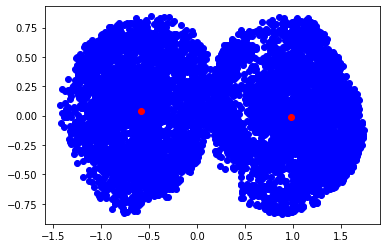




For dataset:  2


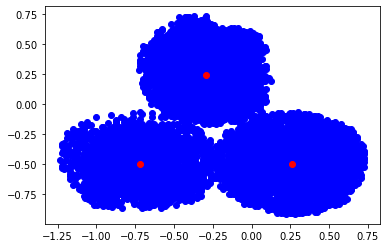




For dataset:  3


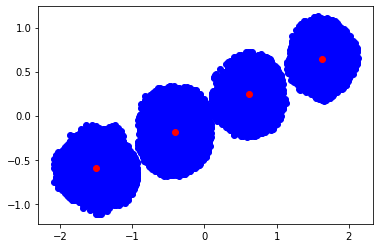




For dataset:  4


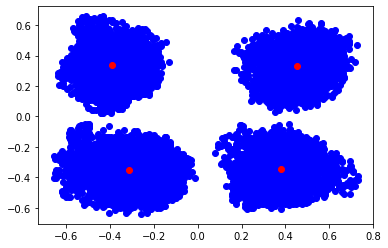

In [ ]:
# colorization of the dataset after it has been clustered with the best k value.
for i in range (len(datasets)):
    x = datasets[i][:,0]
    y = datasets[i][:,1]
    plt.scatter(x, y, c='blue', marker = 'o')
    for j in range(len(centroids[i])):
        plt.scatter(centroids[i][j][0], centroids[i][j][1], c='red')
    print("\n\n\nFor dataset: ", i+1)
    plt.show()